# Appendix file

### Configuration

In [1]:
import tensorflow as tf
from keras.backend.tensorflow_backend import set_session
sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))
set_session(sess)

Using TensorFlow backend.


### Importing modules and dataset

In [2]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.callbacks import Callback
from keras.datasets import mnist

In [3]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

In [4]:
print("Shape of X_train is: {}".format(X_train.shape))
print("Shape of X_test is: {}".format(X_test.shape))

Shape of X_train is: (60000, 28, 28)
Shape of X_test is: (10000, 28, 28)


### Preprocessing

In [5]:
X_train = X_train.astype(np.float32)/255.
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1]*X_train.shape[2]))
X_test = X_test.astype(np.float32)/255.
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1]*X_test.shape[2]))
print("Shape of X_train is: {}".format(X_train.shape))
print("Shape of X_test is: {}".format(X_test.shape))

Shape of X_train is: (60000, 784)
Shape of X_test is: (10000, 784)


In [6]:
y_train = to_categorical(y_train,len(set(y_train)))
y_test = to_categorical(y_test,len(set(y_test)))

In [7]:
epochs = 20
batch = 256
activ_func_list = ['sigmoid','tanh','relu','elu']

### Model building and fitting

In [8]:
def build_nn(activation_type,optimizer):
    model = Sequential()
    model.add(Dense(500,activation=activation_type,input_shape=(784,)))
    model.add(Dense(500,activation=activation_type))
    model.add(Dense(500,activation=activation_type))
    model.add(Dense(500,activation=activation_type))
    model.add(Dense(500,activation=activation_type))
    model.add(Dense(500,activation=activation_type))
    model.add(Dense(500,activation=activation_type))
    model.add(Dense(10,activation='softmax'))
    model.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])
    return model
def hist_gen(hist):
    loss = [hist.history['loss'],hist.history['val_loss']]
    acc = [hist.history['acc'],hist.history['val_acc']]
    return loss, acc

In [9]:
nn_sigmoid = build_nn('sigmoid','sgd')
nn_tanh = build_nn('tanh','sgd')
nn_relu = build_nn('relu','sgd')
nn_elu = build_nn('elu','sgd')

In [10]:
hist_sigmoid = nn_sigmoid.fit(X_train,y_train,epochs=epochs,batch_size=batch,validation_split=0.15,verbose=0)
hist_tanh = nn_tanh.fit(X_train,y_train,epochs=epochs,batch_size=batch,validation_split=0.15,verbose=0)
hist_relu = nn_relu.fit(X_train,y_train,epochs=epochs,batch_size=batch,validation_split=0.15,verbose=0)
hist_elu = nn_elu.fit(X_train,y_train,epochs=epochs,batch_size=batch,validation_split=0.15,verbose=0)

### Training evaluation

In [11]:
(loss_sigmoid,acc_sigmoid) = hist_gen(hist_sigmoid)
(loss_tanh,acc_tanh) = hist_gen(hist_tanh)
(loss_relu,acc_relu) = hist_gen(hist_relu)
(loss_elu,acc_elu) = hist_gen(hist_elu)
loss_list = [loss_sigmoid,loss_tanh,loss_relu,loss_elu]
acc_list = [acc_sigmoid,acc_tanh,acc_relu,acc_elu]

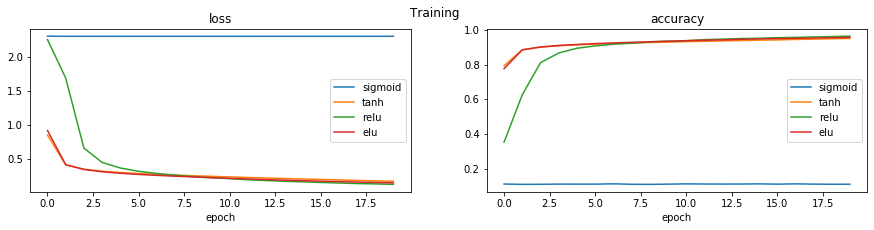

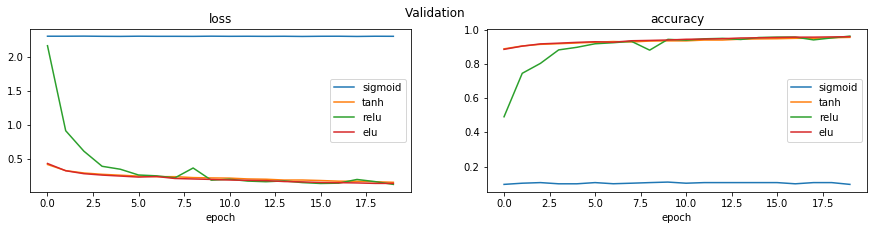

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, axes = plt.subplots(1,2,figsize = (15,3))
fig.suptitle("Training")
for ax,vals,subtitle in zip(axes,(loss_list,acc_list),['loss','accuracy']):
    for val,func_name in zip(vals,activ_func_list):
        ax.plot(val[0],label=func_name)
        ax.legend(loc='best')
        ax.set_xlabel('epoch')
        ax.set_ylabel('')
        ax.set_title(subtitle)
        ax.set_title(subtitle)
fig, axes = plt.subplots(1,2,figsize = (15,3))
fig.suptitle("Validation")
for ax,vals,subtitle in zip(axes,(loss_list,acc_list),['loss','accuracy']):
    for val,func_name in zip(vals,activ_func_list):
        ax.plot(val[1],label=func_name)
        ax.legend(loc='best')
        ax.set_xlabel('epoch')
        ax.set_ylabel('')
        ax.set_title(subtitle)
        ax.set_title(subtitle)

### Model evaluation on test set

In [13]:
print("nn_sigmoid:: Accuracy on the test set: {}".format(nn_sigmoid.evaluate(X_test,y_test,verbose=0)[1]))
print("nn_tanh:: Accuracy on the test set: {}".format(nn_tanh.evaluate(X_test,y_test,verbose=0)[1]))
print("nn_relu:: Accuracy on the test set: {}".format(nn_relu.evaluate(X_test,y_test,verbose=0)[1]))
print("nn_elu:: Accuracy on the test set: {}".format(nn_elu.evaluate(X_test,y_test,verbose=0)[1]))

nn_sigmoid:: Accuracy on the test set: 0.0958
nn_tanh:: Accuracy on the test set: 0.9482
nn_relu:: Accuracy on the test set: 0.9541
nn_elu:: Accuracy on the test set: 0.9547
